# Data Science: Análises para saúde e medicina

## Importando principais bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Visualizando a base de dados

In [2]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [3]:
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


## Explorando dados de casos confirmados

In [4]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [5]:
confirmed.shape

(289, 1147)

In [6]:
confirmed['Country/Region']

0               Afghanistan
1                   Albania
2                   Algeria
3                   Andorra
4                    Angola
               ...         
284      West Bank and Gaza
285    Winter Olympics 2022
286                   Yemen
287                  Zambia
288                Zimbabwe
Name: Country/Region, Length: 289, dtype: object

In [7]:
confirmed['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [8]:
confirmed['Country/Region'].value_counts()

China             34
Canada            16
United Kingdom    15
France            12
Australia          8
                  ..
Guinea             1
Guinea-Bissau      1
Guyana             1
Haiti              1
Zimbabwe           1
Name: Country/Region, Length: 201, dtype: int64

In [9]:
confirmed.iloc[0]

Province/State            NaN
Country/Region    Afghanistan
Lat                  33.93911
Long                67.709953
1/22/20                     0
                     ...     
3/5/23                 209390
3/6/23                 209406
3/7/23                 209436
3/8/23                 209451
3/9/23                 209451
Name: 0, Length: 1147, dtype: object

In [10]:
confirmed.set_index('Country/Region')

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.939110,67.709953,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,NaN,41.153300,20.168300,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,NaN,28.033900,1.659600,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,NaN,42.506300,1.521800,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,NaN,-11.202700,17.873900,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,31.952200,35.233200,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
Winter Olympics 2022,NaN,39.904200,116.407400,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,NaN,15.552727,48.516388,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945


In [11]:
confirmed.set_index('Country/Region').loc['Afghanistan']

Province/State          NaN
Lat                33.93911
Long              67.709953
1/22/20                   0
1/23/20                   0
                    ...    
3/5/23               209390
3/6/23               209406
3/7/23               209436
3/8/23               209451
3/9/23               209451
Name: Afghanistan, Length: 1146, dtype: object

In [12]:
confirmed_by_country = confirmed.groupby('Country/Region').sum()
confirmed_by_country.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [13]:
confirmed_by_country.loc['China'][2:]

1/22/20        548.0
1/23/20        643.0
1/24/20        920.0
1/25/20       1406.0
1/26/20       2075.0
             ...    
3/5/23     4903524.0
3/6/23     4903524.0
3/7/23     4903524.0
3/8/23     4903524.0
3/9/23     4903524.0
Name: China, Length: 1143, dtype: float64

Text(0.5, 1.0, 'Casos confirmados na China até 2 de Março de 2020')

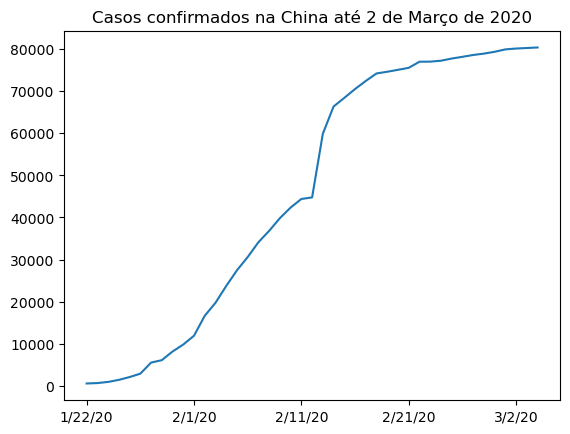

In [14]:
ax = confirmed_by_country.loc['China'][2:45].plot() #Somente até o 45º registro para o gráfico ficar igual ao da aula
ax.set_title('Casos confirmados na China até 2 de Março de 2020')

Text(0.5, 1.0, 'Casos confirmados na China até 18 de outubro de 2022')

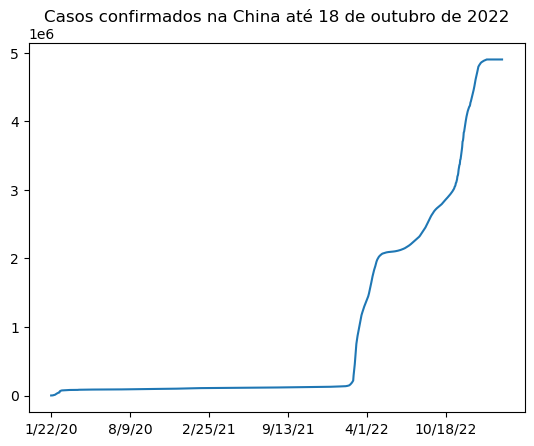

In [15]:
ax = confirmed_by_country.loc['China'][2:].plot() 
ax.set_title('Casos confirmados na China até 18 de outubro de 2022', pad = 15)

## Cuidados com a visualização de dados

A maneira que mostramos os dados pode influenciar o julgamento das pessoas, por isso, devemos sempre cuidar para mostrar os dados como eles são. 

Veja como simplesmente mudar o tamanho do gráfico pode fazer com ele pareça dizer coisas diferentes, apesar de falar a mesma coisa.

Text(0.5, 1.0, 'Casos confirmados na China - A verdade sobre o COVID! Ameaça Real?')

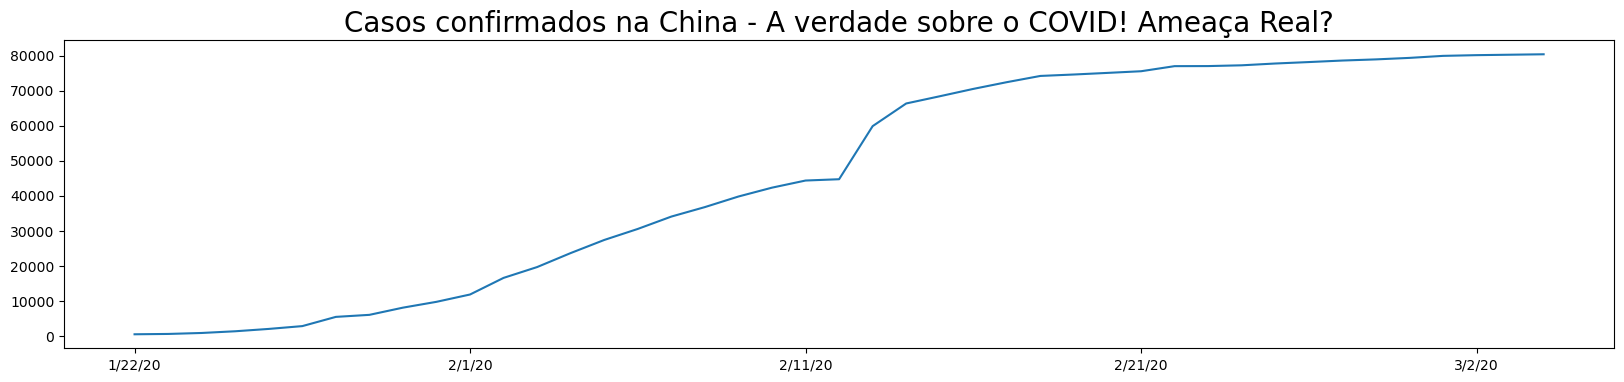

In [16]:
fig = plt.figure(figsize=(20,4))
ax = confirmed_by_country.loc['China'][2:45].plot()
ax.set_title('Casos confirmados na China - A verdade sobre o COVID! Ameaça Real?', fontsize= 20)

Text(0.5, 1.0, 'Casos Confirmados de COVID na China - Urgente!!!')

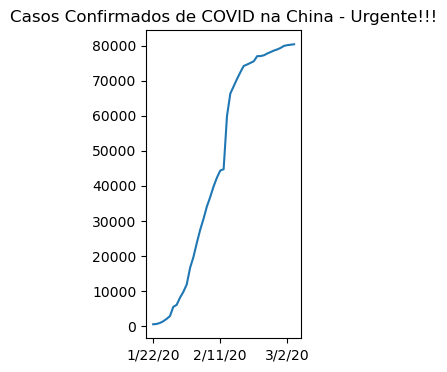

In [17]:
fig = plt.figure(figsize=(2,4))
ax = confirmed_by_country.loc['China'][2:45].plot()
ax.set_title('Casos Confirmados de COVID na China - Urgente!!!')

Ambos os gráficos apresentam os mesmos dados, mas perceba como ambos passam uma mensagem completamente diferente! Raramente pessoas má intencionadas mentem sobre os dados, elas apenas os apresentam de maneira conveniente para a sua narrativa. 

Como cientistas de Dados, temos que tomar muito cuidado para sempre demonstrar os dados de maneira condizente com a realidade!

**Um gráfico mais honesto seria:**

Text(0.5, 1.0, 'Casos Confirmados de COVID na China')

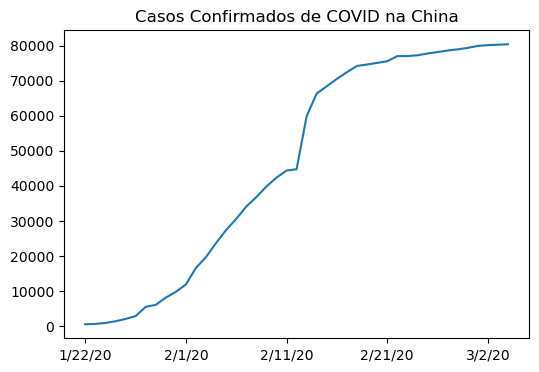

In [18]:
fig = plt.figure(figsize=(6,4))
ax = confirmed_by_country.loc['China'][2:45].plot()
ax.set_title('Casos Confirmados de COVID na China')

Outra maneira de manipular a interpretação de um gráfico é modificar onde o eixo y começa.

Veja:

(40000.0, 80000.0)

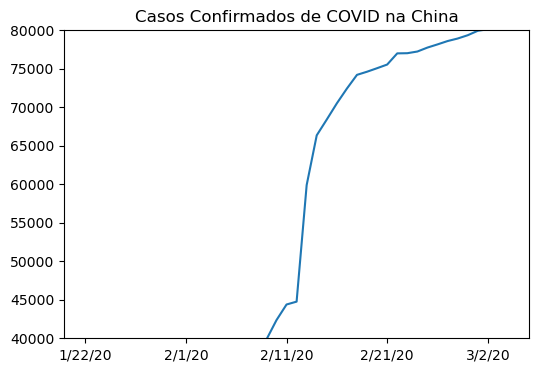

In [19]:
fig = plt.figure(figsize=(6,4))
ax = confirmed_by_country.loc['China'][2:45].plot()
ax.set_title('Casos Confirmados de COVID na China')
plt.ylim(40000, 80000)

(0.0, 400000.0)

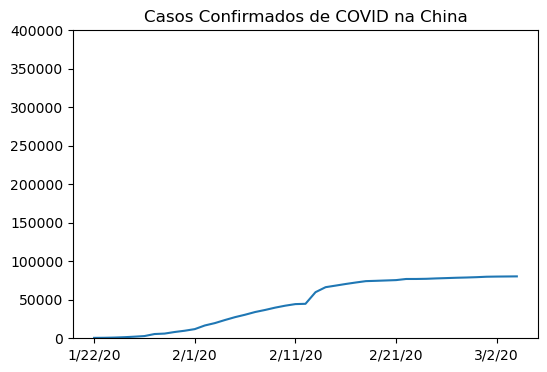

In [20]:
fig = plt.figure(figsize=(6,4))
ax = confirmed_by_country.loc['China'][2:45].plot()
ax.set_title('Casos Confirmados de COVID na China')
plt.ylim(0, 400000)

Os dados mostrados são verdadeiros, mas passam uma mensagem diferente da realidade

Outra coisa muito importante de lembrar, é que esses dados mostram a quantidade de casos confirmados, e não a quantidade de novos casos de COVID. Se em um dia existem 900 casos confirmados e no dia seguinte também, não temos nenhum caso novo de COVID. Por outro lado, se em um dia temos 900 casos e no dia seguinte 905, temos 5 casos novos de COVID.

Agora vamos analizar o surgimento de casos novos ao invés de simplismente a quantidade de casos confirmados.

In [21]:
new_cases_china = confirmed_by_country.loc['China'][2:45].diff().dropna()

Text(0.5, 1.0, 'Novos Casos de COVID na China')

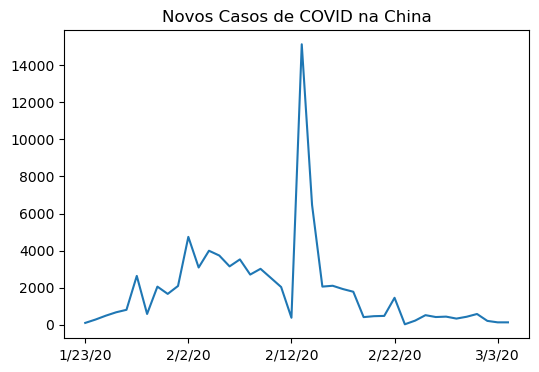

In [22]:
fig = plt.figure(figsize=(6,4))
ax = new_cases_china.plot()
ax.set_title('Novos Casos de COVID na China')

In [23]:
last_date = '3/2/20'

<AxesSubplot:xlabel='Country/Region'>

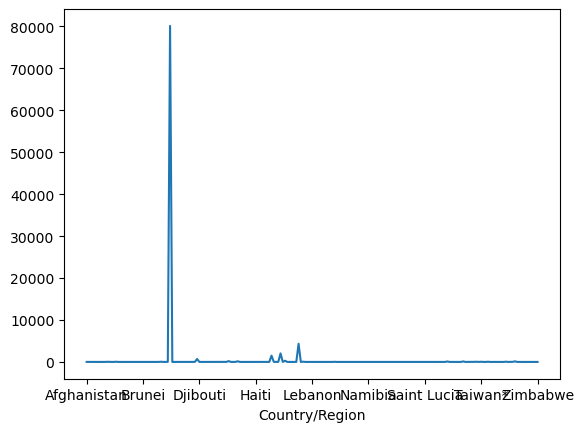

In [24]:
confirmed_by_country[last_date].plot()

<AxesSubplot:ylabel='3/2/20'>

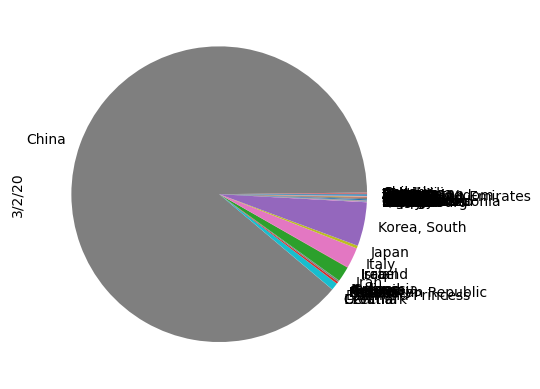

In [25]:
confirmed_by_country[last_date].plot(kind='pie')

Em 99,99% dos casos e gráfico de pizza deve ser evitado! O gráfico acima exemplifica o porquê.

Uma boa prática na visualização de dados é: "Se o gráfico tem nome de comida, não use."

<AxesSubplot:xlabel='Country/Region'>

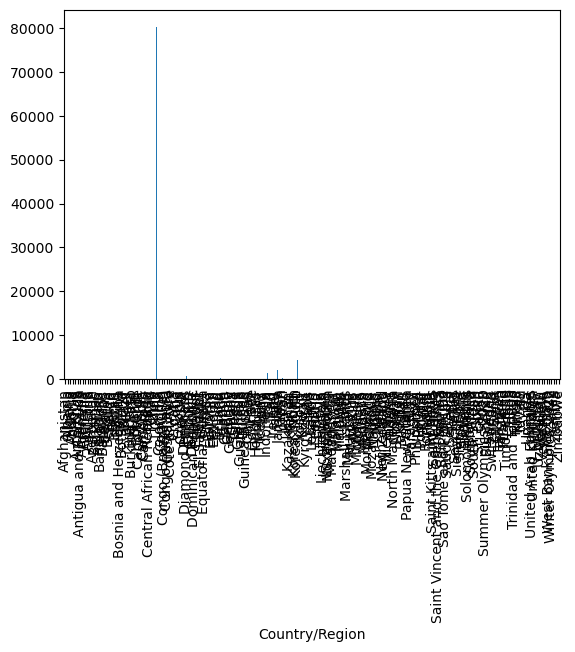

In [26]:
confirmed_by_country[last_date].plot(kind='bar')

O gráfico de barras é mais recomendado nessas situações. Mas, como podemos ver, também não é p mais adequado em nosso caso, pois temos muitos países!

O melhor em nosso caso seria selecionar apenas alguns países e fazer o gráfico apenas com os países selecionados.

Vamos fazer um gráfico apenas com os 10 países com mais casos confirmados:

Text(0.5, 1.0, 'Casos Confirmados de COVID no 10 países com maior infecção')

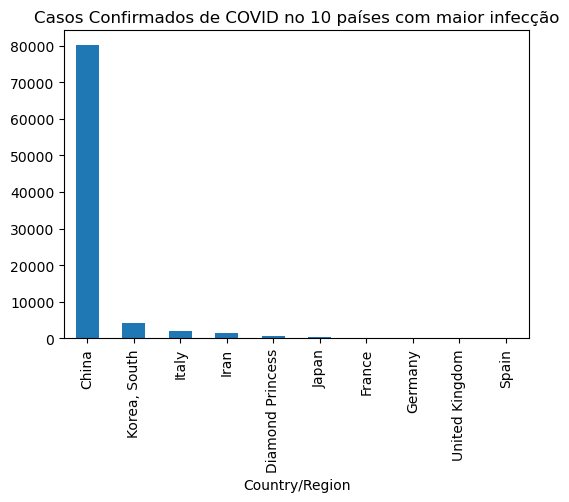

In [27]:
fig = plt.figure(figsize=(6,4))
ax = confirmed_by_country[last_date].sort_values(ascending=False)[0:10].plot(kind='bar')
ax.set_title('Casos Confirmados de COVID no 10 países com maior infecção')

Text(0.5, 1.0, 'Casos Confirmados de COVID no 10 países com maior infecção (Desconsiderando China)')

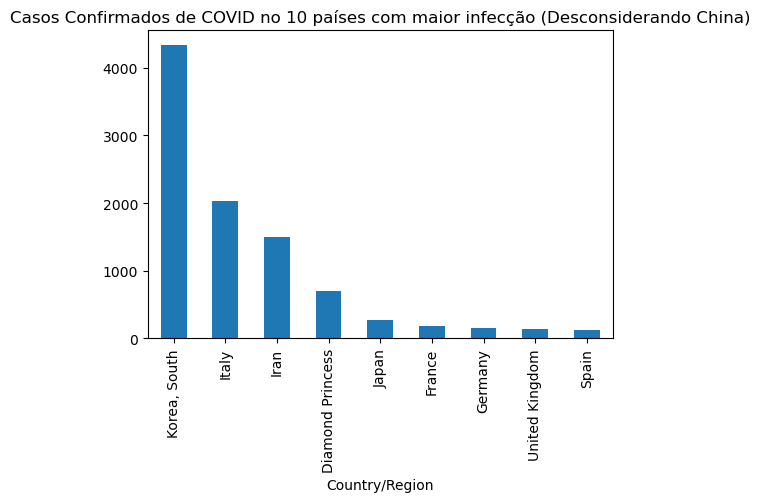

In [28]:
fig = plt.figure(figsize=(6,4))
ax = confirmed_by_country[last_date].sort_values(ascending=False)[1:10].plot(kind='bar')
ax.set_title('Casos Confirmados de COVID no 10 países com maior infecção (Desconsiderando China)')

## Seguindo com a Análise

In [29]:
def latest_by_country(data):
  return data.groupby("Country/Region").sum().iloc[:,-1]

In [30]:
latest_by_country(confirmed)

Country/Region
Afghanistan             209451
Albania                 334457
Algeria                 271496
Andorra                  47890
Angola                  105288
                         ...  
West Bank and Gaza      703228
Winter Olympics 2022       535
Yemen                    11945
Zambia                  343135
Zimbabwe                264276
Name: 3/9/23, Length: 201, dtype: int64

In [31]:
latest_by_country(deaths)

Country/Region
Afghanistan             7896
Albania                 3598
Algeria                 6881
Andorra                  165
Angola                  1933
                        ... 
West Bank and Gaza      5708
Winter Olympics 2022       0
Yemen                   2159
Zambia                  4057
Zimbabwe                5671
Name: 3/9/23, Length: 201, dtype: int64

In [32]:
info = [latest_by_country(confirmed), latest_by_country(deaths)]

In [33]:
combined = pd.concat(info, axis=1)
combined.columns = ['Confirmados', 'Mortos']
combined

,Confirmados,Mortos
Country/Region,,
Afghanistan,209451,7896
Albania,334457,3598
Algeria,271496,6881
Andorra,47890,165
Angola,105288,1933
...,...,...
West Bank and Gaza,703228,5708
Winter Olympics 2022,535,0
Yemen,11945,2159


## Calculando taxa de Mortalidade

In [34]:
sum_up = combined.sum()
sum_up

Confirmados    676570149
Mortos           6881802
dtype: int64

In [35]:
lethality_rate_1 = (sum_up['Mortos'] / sum_up['Confirmados'])*100
lethality_rate_1

1.017160158510038

In [36]:
lethality_rate_1 = (combined["Mortos"] / combined["Confirmados"])*100
lethality_rate_1

Country/Region
Afghanistan              3.769855
Albania                  1.075774
Algeria                  2.534476
Andorra                  0.344540
Angola                   1.835917
                          ...    
West Bank and Gaza       0.811686
Winter Olympics 2022     0.000000
Yemen                   18.074508
Zambia                   1.182333
Zimbabwe                 2.145863
Length: 201, dtype: float64

In [37]:
combined["Taxa de Mortalidade 1"] = lethality_rate_1
combined

,Confirmados,Mortos,Taxa de Mortalidade 1
Country/Region,,,
Afghanistan,209451,7896,3.769855
Albania,334457,3598,1.075774
Algeria,271496,6881,2.534476
Andorra,47890,165,0.344540
Angola,105288,1933,1.835917
...,...,...,...
West Bank and Gaza,703228,5708,0.811686
Winter Olympics 2022,535,0,0.000000
Yemen,11945,2159,18.074508


In [38]:
combined.sort_values('Taxa de Mortalidade 1', ascending=False).head(10)

,Confirmados,Mortos,Taxa de Mortalidade 1
Country/Region,,,
"Korea, North",1,6,600.000000
MS Zaandam,9,2,22.222222
Yemen,11945,2159,18.074508
Sudan,63829,5017,7.860064
Syria,57467,3164,5.505769
Somalia,27324,1361,4.980969
Peru,4487553,219539,4.892176
Egypt,515759,24812,4.810774
Mexico,7483444,333188,4.452335


Podemos perceber alguns números estranhos, vamos fazer a mesma visualização mas apenas com países onde temos mais de 100 casos confirmados

In [39]:
combined.query('Confirmados >= 100').sort_values('Taxa de Mortalidade 1', ascending=False).head(10)

,Confirmados,Mortos,Taxa de Mortalidade 1
Country/Region,,,
Yemen,11945,2159,18.074508
Sudan,63829,5017,7.860064
Syria,57467,3164,5.505769
Somalia,27324,1361,4.980969
Peru,4487553,219539,4.892176
Egypt,515759,24812,4.810774
Mexico,7483444,333188,4.452335
Bosnia and Herzegovina,401729,16280,4.052483
Afghanistan,209451,7896,3.769855


In [40]:
combined.query('Confirmados >= 100')['Taxa de Mortalidade 1'].mean()

1.4053090823828056

<AxesSubplot:xlabel='Confirmados', ylabel='Taxa de Mortalidade 1'>

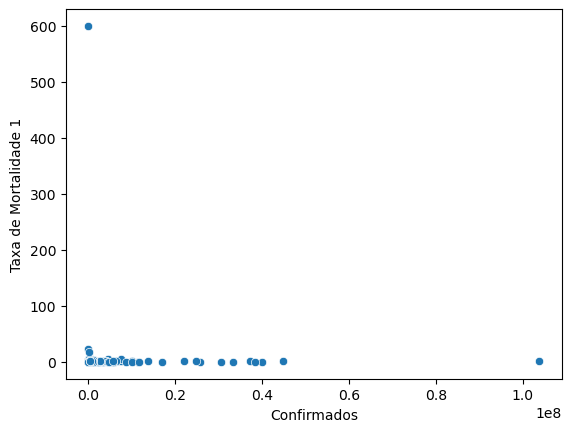

In [41]:
sns.scatterplot(data=combined, x='Confirmados', y='Taxa de Mortalidade 1')

<AxesSubplot:xlabel='Confirmados', ylabel='Taxa de Mortalidade 1'>

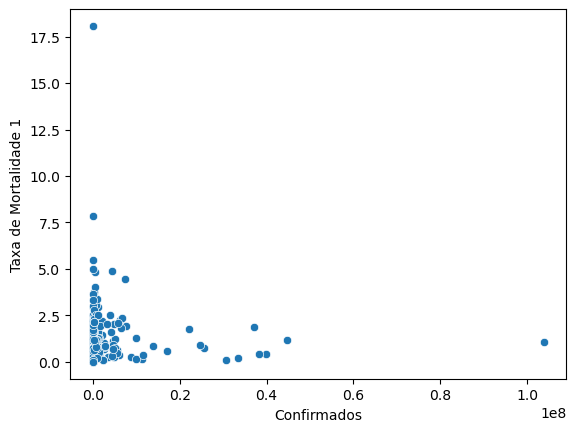

In [42]:
sns.scatterplot(data=combined.query('Confirmados >= 100'), x='Confirmados', y='Taxa de Mortalidade 1')

<AxesSubplot:xlabel='Taxa de Mortalidade 1', ylabel='Count'>

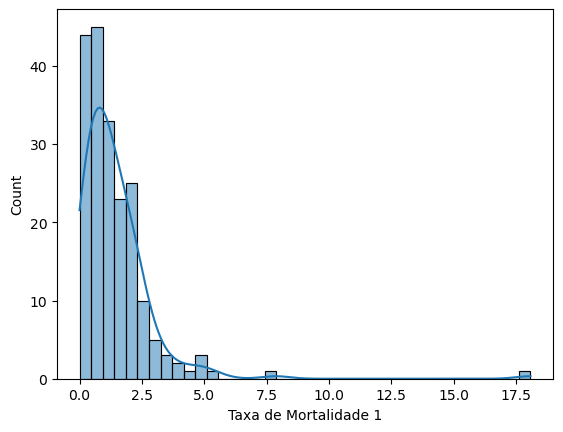

In [43]:
sns.histplot(combined.query('Confirmados >= 100')['Taxa de Mortalidade 1'], kde=True)

# Data Science: Visualização de dados para saúde e medicina

In [67]:
confirmed.set_index('Country/Region').loc['China'].sum()[3:]

1/22/20         548
1/23/20         643
1/24/20         920
1/25/20        1406
1/26/20        2075
             ...   
3/6/23      4903524
3/7/23      4903524
3/8/23      4903524
3/9/23      4903524
is_china         34
Length: 1144, dtype: object

In [68]:
is_china = confirmed['Country/Region'] == 'China'
is_china

0      False
1      False
2      False
3      False
4      False
       ...  
284    False
285    False
286    False
287    False
288    False
Name: Country/Region, Length: 289, dtype: bool

In [69]:
confirmed['is_china'] = is_china
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,is_china
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209340,209358,209362,209369,209390,209406,209436,209451,209451,False
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334408,334408,334427,334427,334427,334427,334427,334443,334457,False
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271448,271463,271469,271469,271477,271477,271490,271494,271496,False
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47875,47875,47875,47875,47875,47875,47875,47890,47890,False
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105277,105277,105277,105277,105277,105277,105277,105288,105288,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,False
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,False
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,False
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343079,343079,343079,343135,343135,343135,343135,343135,False


In [71]:
confirmed.query('is_china')

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,is_china
59,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,2275,2275,2275,2275,2275,2275,2275,2275,2275,True
60,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,40774,40774,40774,40774,40774,40774,40774,40774,40774,True
61,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,14715,14715,14715,14715,14715,14715,14715,14715,14715,True
62,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,17122,17122,17122,17122,17122,17122,17122,17122,17122,True
63,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,...,1742,1742,1742,1742,1742,1742,1742,1742,1742,True
64,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,103248,103248,103248,103248,103248,103248,103248,103248,103248,True
65,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,13371,13371,13371,13371,13371,13371,13371,13371,13371,True
66,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,2534,2534,2534,2534,2534,2534,2534,2534,2534,True
67,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,10483,10483,10483,10483,10483,10483,10483,10483,10483,True
68,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,3292,3292,3292,3292,3292,3292,3292,3292,3292,True


In [72]:
confirmed.groupby('is_china').sum()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
is_china,,,,,,,,,,,,,,,,,,,,,
False,4573.979946,2677.320324,9,14,24,31,45,52,71,82,...,670418714,670639328,670828387,671011056,671065251,671121377,671179417,671309854,671489300,671666625
True,1085.292300,3688.937700,548,643,920,1406,2075,2877,5509,6087,...,4903524,4903524,4903524,4903524,4903524,4903524,4903524,4903524,4903524,4903524


<AxesSubplot:xlabel='is_china'>

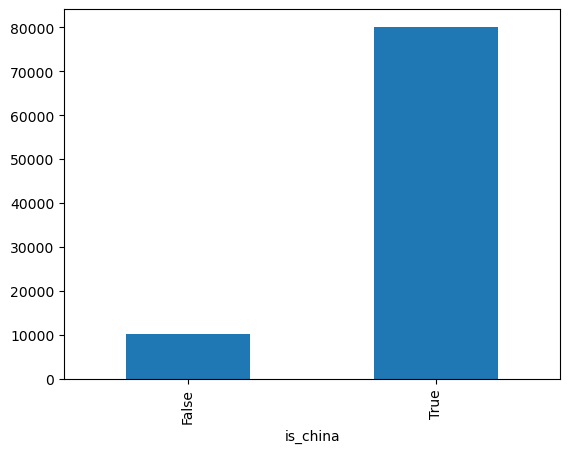

In [74]:
confirmed.groupby('is_china').sum()['3/2/20'].plot(kind='bar') # 3/2/20 é a mesma data analisada na aula

<AxesSubplot:xlabel='is_china'>

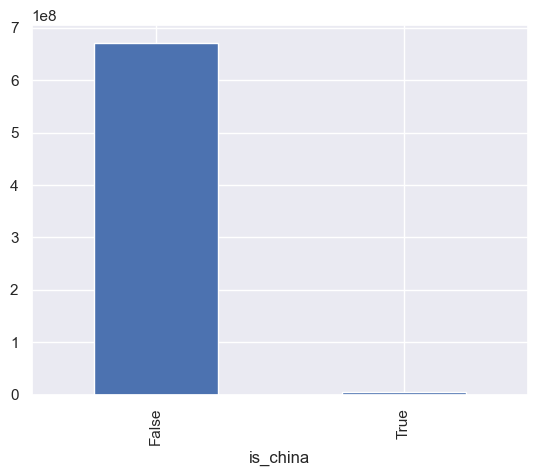

In [92]:
confirmed.groupby('is_china').sum()['3/9/23'].plot(kind='bar') # 3/9/23 é a última dada em no dataset atualizado

Podemos perceber que no começo da Pandemia (quando ainda nem era uma pandemia) a esmagadora maioria dos casos confirmados eram da China, país onde infelizmente a doença começou. Com o passar do tempo, houve uma inversão, e a maior parte dos casos confirmados é de todos os países juntos.

Como a doença se espalhou por todo o mundo, é bastante óbvio que comparar todos o países juntos com apenas um irá resultar em muitos mais casos na soma de todos os países.

## Embelezando o gráfico

In [79]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep')

In [80]:
confirmed['china_label'] = np.where(confirmed['is_china'], 'China', 'Others')

In [81]:
confirmed.head(1)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,is_china,china_label
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209358,209362,209369,209390,209406,209436,209451,209451,False,Others


[Text(0.5, 0, 'Países')]

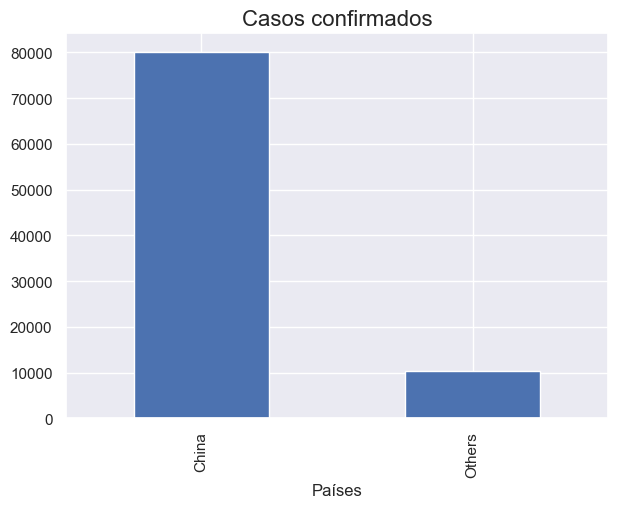

In [90]:
fig = plt.figure(figsize=(7,5))
ax = confirmed.groupby('china_label').sum()['3/2/20'].plot(kind='bar')
ax.set_title('Casos confirmados', fontsize=16)
ax.set(xlabel='Países')

[Text(0.5, 0, 'Países')]

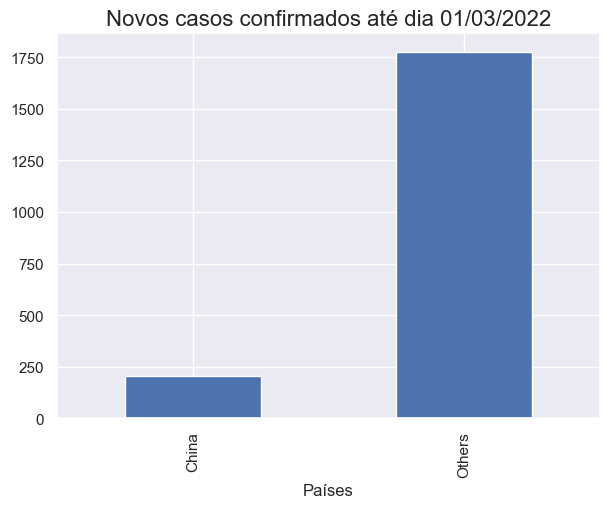

In [93]:
summ = confirmed.groupby('china_label').sum()
summ['delta'] = summ['3/2/20'] - summ['3/1/20']

fig = plt.figure(figsize=(7,5))
ax = summ['delta'].plot(kind='bar')
ax.set_title('Novos casos confirmados até dia 01/03/2022', fontsize=16)
ax.set(xlabel='Países')

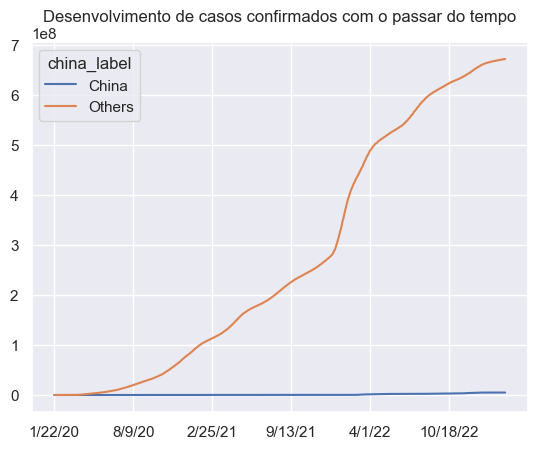

In [124]:
summ.T[2:-2].plot()
plt.title('Desenvolvimento de casos confirmados com o passar do tempo', pad=15)
plt.show()

In [125]:
dif = summ.T[2:-2].diff().dropna()

Text(0.5, 1.0, 'Casos novos com o decorrer do tempo')

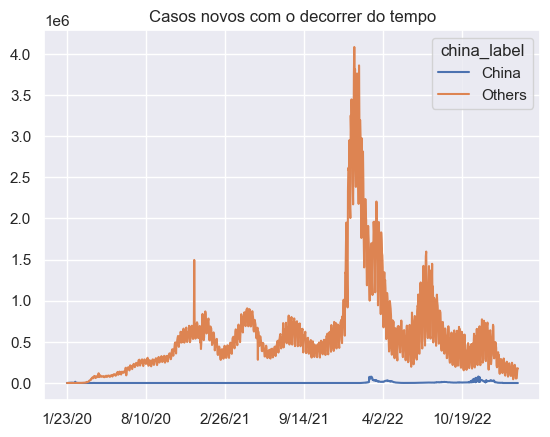

In [126]:
dif.plot()
plt.title('Casos novos com o decorrer do tempo')

## Calculando Taxa de Incidencia

In [128]:
cases = confirmed.groupby('china_label').sum()[last_date].loc['China']
china_population = 1411750000 
china_incidence_ratio = cases / china_population
china_incidence_ratio

5.6763591287409245e-05

In [129]:
china_incidence_ratio * 100000

5.676359128740924

In [131]:
un_pop = pd.read_csv("https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv")

ParserError: Error tokenizing data. C error: Expected 1 fields in line 6, saw 8
